# Alunos

Completar os nomes depois
* Gabriel
* Larissa
* Sofia


# Hipótese 2

## Pergunta a ser respondida: A polarização política do país influencia no comparecimento de pessoas que não são obrigadas a votar nas eleições?

    * Qual grupo ( Analfabetos, Menores de 18 anos ou Maiores de 70 anos ) sofre maior influência dos fatores políticos?

    * Não sei oq mais

# Import dos Módulos Utilizados

In [2]:
import numpy as np
import pandas as pd
import squarify
import matplotlib
import matplotlib.pyplot as plt

# Carregamento dos datasets

http://data.uis.unesco.org/#

In [3]:
original_2002 = pd.read_csv('Datasets\perfil_eleitorado_2002.csv',  encoding='cp1252', sep=";")
original_2006 = pd.read_csv('Datasets\perfil_eleitorado_2006.csv',  encoding='cp1252', sep=";")
# O carregamento dos dados do ano de 2010 foi realizado especificando as colunas de acordo com o documento LEIAME 
original_2010 = pd.read_csv('Datasets\perfil_eleitorado_2010.txt',  encoding='cp1252', sep=";", names=["PERIODO", "UF", "MUNICIPIO", "COD_MUNICIPIO_TSE", "NR_ZONA", "SEXO", "FAIXA_ETARIA", "GRAU_DE_ESCOLARIDADE", "QTD_ELEITORES_PERFIL"], low_memory=False)
original_2014 = pd.read_csv('Datasets\perfil_eleitorado_2014.csv',  encoding='cp1252', sep=";")
original_2018 = pd.read_csv('Datasets\perfil_eleitorado_2018.csv',  encoding='cp1252', sep=";")
original_2022 = pd.read_csv('Datasets\perfil_eleitorado_2022.csv',  encoding='cp1252', sep=";")


In [4]:
alfabetismo = pd.read_csv('Datasets\literacy.csv', encoding='cp1252', sep=",", on_bad_lines='skip')

# Remoção de Colunas Desnecessárias

In [5]:
eleitorado_2002 = original_2002[["ANO_ELEICAO", "SG_UF", "DS_GENERO", "DS_GRAU_ESCOLARIDADE", "QT_ELEITORES_PERFIL"]].copy()
eleitorado_2006 = original_2006[["ANO_ELEICAO", "SG_UF", "DS_GENERO", "DS_GRAU_ESCOLARIDADE", "QT_ELEITORES_PERFIL"]].copy()
eleitorado_2010 = original_2010[["PERIODO", "UF", "SEXO", "FAIXA_ETARIA", "GRAU_DE_ESCOLARIDADE", "QTD_ELEITORES_PERFIL"]].copy()
eleitorado_2014 = original_2014[["ANO_ELEICAO", "SG_UF", "DS_GENERO", "DS_FAIXA_ETARIA", "DS_GRAU_ESCOLARIDADE", "QT_ELEITORES_PERFIL"]].copy()
eleitorado_2018 = original_2018[["ANO_ELEICAO", "SG_UF", "DS_GENERO", "DS_FAIXA_ETARIA", "DS_GRAU_ESCOLARIDADE", "QT_ELEITORES_PERFIL"]].copy()
eleitorado_2022 = original_2022[["ANO_ELEICAO", "SG_UF", "DS_GENERO", "DS_FAIXA_ETARIA", "DS_GRAU_ESCOLARIDADE", "QT_ELEITORES_PERFIL"]].copy()


### Para o dataset de alfabetismo foram separadas as colunas com os anos em que houve eleição. Em razão de não existirem dados de 2022 foi escolhido utilizar 2021 como referência para essa eleição, o mesmo ocorreu com 2002 em que foram utilizados dados de 2004

In [6]:
alfabetismo_brasil = alfabetismo.loc[alfabetismo['Country Name'].isin(['Brazil'])]
alfabetismo_brasil_anos_eleicao = alfabetismo_brasil[['2004', '2006', '2010', '2014', '2018', '2021']].astype('float')
alfabetismo_brasil_anos_eleicao

,2004,2006,2010,2014,2018,2021
29,88.616241,89.615227,90.379181,91.729431,93.227501,94.300003


In [7]:
"""
dataset_2002
dataset_2006
dataset_2010
dataset_2014
dataset_2018
dataset_2022
"""

'\ndataset_2002\ndataset_2006\ndataset_2010\ndataset_2014\ndataset_2018\ndataset_2022\n'

# Remoção de Valores Inválidos

Foram analisados os valores das colunas e verificou-se que apenas no dataset de 2010 havia valores NaN. Também foi verificado se valores "NÃO INFORMADO" para grau de escolaridade e gênero formavam um grupo considerável. Com a confirmação de que os dados em que não foi informada escolaridade englobam parte considerável dos eleitores envolvidos foi escolhido manter essas categorias a fim de estudo.

In [8]:
datanova = original_2002.loc[original_2002["DS_GRAU_ESCOLARIDADE"].isin(['ANALFABETO'])]
print(datanova['QT_ELEITORES_PERFIL'].sum())
print(original_2002['QT_ELEITORES_PERFIL'].sum())

8345043
115254113


### Eleitorado 2010 - Remoção de NaN

Foi observado que uma das linhas do dataset continha valores inválidos como Nan. Assim foi escolhido remover a linha pois não continha nenhuma informação relevante. 
Também foram removidos registros com idade 'INVÁLIDA'

In [9]:
eleitorado_2010 = eleitorado_2010.drop([1326721])

# Padronização dos nomes de colunas

In [10]:
eleitorado_2002.rename(columns={ 'SG_UF': 'UF', 'DS_GENERO': 'GENERO', 'DS_GRAU_ESCOLARIDADE': 'GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL': 'QTD_ELEITORES_PERFIL'}, inplace=True)
eleitorado_2006.rename(columns={ 'SG_UF': 'UF', 'DS_GENERO': 'GENERO', 'DS_GRAU_ESCOLARIDADE': 'GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL': 'QTD_ELEITORES_PERFIL'}, inplace=True)
eleitorado_2010.rename(columns={ 'PERIODO': 'ANO_ELEICAO', 'SEXO': 'GENERO', 'GRAU_DE_ESCOLARIDADE': 'GRAU_ESCOLARIDADE'}, inplace=True)
eleitorado_2014.rename(columns={ 'SG_UF': 'UF', 'DS_GENERO': 'GENERO', 'DS_GRAU_ESCOLARIDADE': 'GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL': 'QTD_ELEITORES_PERFIL', 'DS_FAIXA_ETARIA': 'FAIXA_ETARIA'}, inplace=True)
eleitorado_2018.rename(columns={ 'SG_UF': 'UF', 'DS_GENERO': 'GENERO', 'DS_GRAU_ESCOLARIDADE': 'GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL': 'QTD_ELEITORES_PERFIL', 'DS_FAIXA_ETARIA': 'FAIXA_ETARIA'}, inplace=True)
eleitorado_2022.rename(columns={ 'SG_UF': 'UF', 'DS_GENERO': 'GENERO', 'DS_GRAU_ESCOLARIDADE': 'GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL': 'QTD_ELEITORES_PERFIL', 'DS_FAIXA_ETARIA': 'FAIXA_ETARIA'}, inplace=True)

### Remoção de idade 'INVÁLIDA'

In [11]:
def remover_idade_invalida(dataset: pd.DataFrame, nome) -> pd.DataFrame:
    return dataset[dataset.FAIXA_ETARIA != nome]

In [12]:
eleitorado_2010 = remover_idade_invalida(eleitorado_2010, 'INVÁLIDA')
eleitorado_2014 = remover_idade_invalida(eleitorado_2014, 'INVÁLIDO')
eleitorado_2018 = remover_idade_invalida(eleitorado_2018, 'INVÁLIDO')
eleitorado_2022 = remover_idade_invalida(eleitorado_2022, 'INVÁLIDO')

# Remoção de espaços a mais em colunas 
# Padronização dos dados de faixa etária para upper case 

In [13]:
def remover_whitespaces_faixa_etaria_e_padronizar(dataset: pd.DataFrame) -> pd.DataFrame:
    aux = dataset['FAIXA_ETARIA'].str.strip()
    return aux.str.upper() 

In [14]:
eleitorado_2014['FAIXA_ETARIA'] = remover_whitespaces_faixa_etaria_e_padronizar(eleitorado_2014)
eleitorado_2018['FAIXA_ETARIA'] = remover_whitespaces_faixa_etaria_e_padronizar(eleitorado_2018)
eleitorado_2022['FAIXA_ETARIA'] = remover_whitespaces_faixa_etaria_e_padronizar(eleitorado_2022)

# Remoção de eleitores obrigados a votar e separação em grupos

Esses eleitores não fazem parte do estudo. 
Não são obrigados a votar e fazem parte do estudo: pessoas de 16 e 17 anos, com idade maior que 70 anos ou analfabetos.

*Nos anos de 2002 e 2006 foram considerados apenas os analfabetos pois não há registro de faixa etária nos datasets.

#### Analfabetos

In [15]:
def separar_eleitores_analfabetos(dataset: pd.DataFrame) -> pd.DataFrame:
    return dataset.loc[dataset['GRAU_ESCOLARIDADE'].isin(['ANALFABETO'])]

def remover_eleitores_analfabetos(dataset: pd.DataFrame) -> pd.DataFrame:
    return dataset[dataset.GRAU_ESCOLARIDADE != 'ANALFABETO']

In [16]:
eleitorado_2002_analfabeto = separar_eleitores_analfabetos(eleitorado_2002)
eleitorado_2006_analfabeto = separar_eleitores_analfabetos(eleitorado_2006)
eleitorado_2010_analfabeto = separar_eleitores_analfabetos(eleitorado_2010)
eleitorado_2014_analfabeto = separar_eleitores_analfabetos(eleitorado_2014)
eleitorado_2018_analfabeto = separar_eleitores_analfabetos(eleitorado_2018)
eleitorado_2022_analfabeto = separar_eleitores_analfabetos(eleitorado_2022)

In [17]:
analfabetos = eleitorado_2002_analfabeto.loc[eleitorado_2002_analfabeto['GRAU_ESCOLARIDADE'].isin(['ANALFABETO'])]
print(analfabetos.QTD_ELEITORES_PERFIL.sum())
print(eleitorado_2002.QTD_ELEITORES_PERFIL.sum())

8345043
115254113


#### Menores de 18 anos

In [18]:
def separar_eleitores_menores_de_18(dataset: pd.DataFrame) -> pd.DataFrame:
    return dataset.loc[dataset['FAIXA_ETARIA'].isin(['16 ANOS', '17 ANOS'])]

In [19]:
eleitorado_2010_menores_de_18 = separar_eleitores_menores_de_18(eleitorado_2010)
eleitorado_2014_menores_de_18 = separar_eleitores_menores_de_18(eleitorado_2014)
eleitorado_2018_menores_de_18 = separar_eleitores_menores_de_18(eleitorado_2018)
eleitorado_2022_menores_de_18 = separar_eleitores_menores_de_18(eleitorado_2022)

eleitorado_2010_menores_de_18 = remover_eleitores_analfabetos(eleitorado_2010_menores_de_18)
eleitorado_2014_menores_de_18 = remover_eleitores_analfabetos(eleitorado_2014_menores_de_18)
eleitorado_2018_menores_de_18 = remover_eleitores_analfabetos(eleitorado_2018_menores_de_18)
eleitorado_2022_menores_de_18 = remover_eleitores_analfabetos(eleitorado_2022_menores_de_18)

#### Maiores de 70 anos

In [20]:
def separar_eleitores_maiores_de_70(dataset: pd.DataFrame, faixas_etarias: "list[str]") -> pd.DataFrame:
    return dataset.loc[dataset['FAIXA_ETARIA'].isin(faixas_etarias)]

In [21]:
eleitorado_2010_maiores_de_70 = separar_eleitores_maiores_de_70(eleitorado_2010, ['70 A 79 ANOS', 'SUPERIOR A 79 ANOS'])
eleitorado_2014_maiores_de_70 = separar_eleitores_maiores_de_70(eleitorado_2014, ['70 A 74 ANOS', '75 A 79 ANOS', '80 A 84 ANOS', '85 A 89 ANOS', '90 A 94 ANOS', '95 A 99 ANOS', '100 ANOS OU MAIS'])
eleitorado_2018_maiores_de_70 = separar_eleitores_maiores_de_70(eleitorado_2018, ['70 A 74 ANOS', '75 A 79 ANOS', '80 A 84 ANOS', '85 A 89 ANOS', '90 A 94 ANOS', '95 A 99 ANOS', '100 ANOS OU MAIS'])
eleitorado_2022_maiores_de_70 = separar_eleitores_maiores_de_70(eleitorado_2022, ['70 A 74 ANOS', '75 A 79 ANOS', '80 A 84 ANOS', '85 A 89 ANOS', '90 A 94 ANOS', '95 A 99 ANOS', '100 ANOS OU MAIS'])

eleitorado_2010_maiores_de_70 = remover_eleitores_analfabetos(eleitorado_2010_maiores_de_70)
eleitorado_2014_maiores_de_70 = remover_eleitores_analfabetos(eleitorado_2014_maiores_de_70)
eleitorado_2018_maiores_de_70 = remover_eleitores_analfabetos(eleitorado_2018_maiores_de_70)
eleitorado_2022_maiores_de_70 = remover_eleitores_analfabetos(eleitorado_2022_maiores_de_70)

In [22]:
eleitorado_2002_analfabeto

,ANO_ELEICAO,UF,GENERO,GRAU_ESCOLARIDADE,QTD_ELEITORES_PERFIL
1,2002,TO,FEMININO,ANALFABETO,227
7,2002,PR,FEMININO,ANALFABETO,140
11,2002,MG,NÃO INFORMADO,ANALFABETO,3
16,2002,PR,MASCULINO,ANALFABETO,148
25,2002,CE,FEMININO,ANALFABETO,1395
...,...,...,...,...,...
128512,2002,MA,NÃO INFORMADO,ANALFABETO,5
128513,2002,MG,NÃO INFORMADO,ANALFABETO,3
128516,2002,TO,FEMININO,ANALFABETO,204
128522,2002,PR,FEMININO,ANALFABETO,345


# Gráficos


In [23]:
eleitorado_2010

,ANO_ELEICAO,UF,GENERO,FAIXA_ETARIA,GRAU_ESCOLARIDADE,QTD_ELEITORES_PERFIL
0,2010,AC,FEMININO,16 ANOS,ENSINO FUNDAMENTAL COMPLETO,2.0
1,2010,AC,FEMININO,16 ANOS,ENSINO FUNDAMENTAL INCOMPLETO,18.0
2,2010,AC,FEMININO,16 ANOS,ENSINO MÉDIO COMPLETO,1.0
3,2010,AC,FEMININO,16 ANOS,ENSINO MÉDIO INCOMPLETO,16.0
4,2010,AC,FEMININO,16 ANOS,LÊ E ESCREVE,6.0
...,...,...,...,...,...,...
1326716,2010,ZZ,MASCULINO,70 A 79 ANOS,SUPERIOR INCOMPLETO,3.0
1326717,2010,ZZ,MASCULINO,SUPERIOR A 79 ANOS,ENSINO FUNDAMENTAL INCOMPLETO,1.0
1326718,2010,ZZ,MASCULINO,SUPERIOR A 79 ANOS,ENSINO MÉDIO COMPLETO,3.0
1326719,2010,ZZ,MASCULINO,SUPERIOR A 79 ANOS,SUPERIOR COMPLETO,10.0


TypeError: only size-1 arrays can be converted to Python scalars

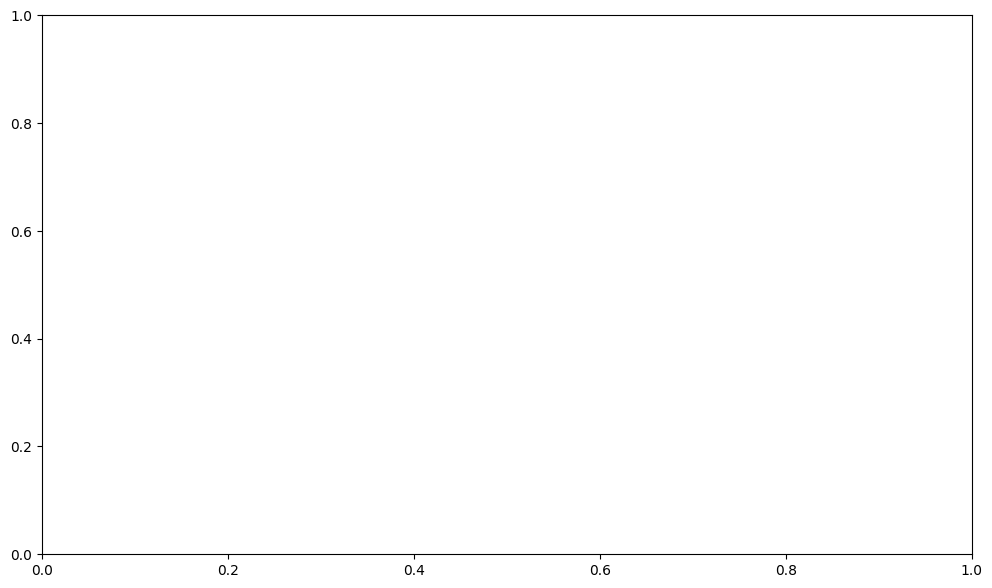

In [24]:
grupos_2010 = eleitorado_2010.groupby(by=['FAIXA_ETARIA', 'GRAU_ESCOLARIDADE'])[['QTD_ELEITORES_PERFIL']].sum()
alf = alfabetismo_brasil_anos_eleicao.groupby(by=['2004', '2006', '2010', '2014', '2018', '2021']).sum()
plt.figure(figsize=(12,7))
squarify.plot(sizes=alf.values, label=alf.index, alpha=0.7)

plt.axis('off')

plt.show()


(0.0, 100.0, 0.0, 100.0)

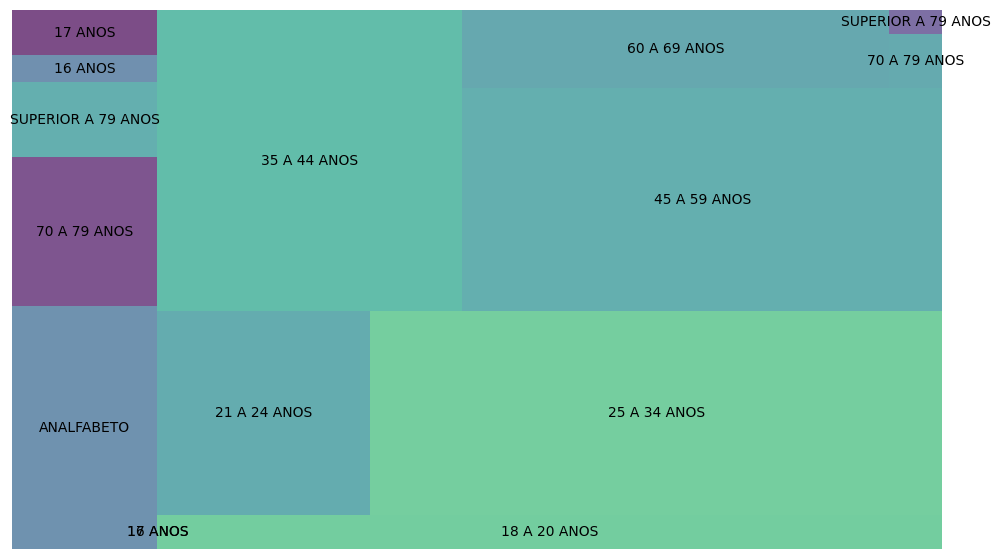

In [38]:
grupos_2010_escolaridade = eleitorado_2010_analfabeto.groupby(by=['GRAU_ESCOLARIDADE'])[['QTD_ELEITORES_PERFIL']].sum()
grupos_2010_idade = eleitorado_2010_maiores_de_70.groupby('FAIXA_ETARIA')[['QTD_ELEITORES_PERFIL']].sum()
grupos_2010_novos = eleitorado_2010_menores_de_18.groupby('FAIXA_ETARIA')[['QTD_ELEITORES_PERFIL']].sum()
#Tá errado
outros_2010 = pd.concat([eleitorado_2010, eleitorado_2010_menores_de_18, eleitorado_2010_maiores_de_70]).drop_duplicates(keep=False).groupby('FAIXA_ETARIA')[['QTD_ELEITORES_PERFIL']].sum()
grupos_2010 = pd.concat([grupos_2010_escolaridade, grupos_2010_idade, grupos_2010_novos, outros_2010])
plt.figure(figsize=(12,7))
squarify.plot(sizes=grupos_2010.values, label=grupos_2010.index, alpha=0.7)

plt.axis('off')

##plt.show()
